# 数据探索与可视化

In [1]:
#解压imgs.zip文件
import zipfile
from os.path import isfile, isdir

imgs_path = '/home/ubuntu/distracted_driver_detection/imgs'
zip_path = '/home/ubuntu/distracted_driver_detection/imgs.zip'

if not isdir(imgs_path):
    file = zipfile.ZipFile(zip_path, 'r')
    file.extractall(imgs_path)
    file.close()
    print("解压已完成")
else:
    print(imgs_path + " 已存在")


/home/ubuntu/distracted_driver_detection/imgs 已存在


### 检测csv文件中的测试图片是否与测试集(Train set)中图片相同

In [2]:
import os
import pandas as pd
import numpy as np

csv_path = '/home/ubuntu/distracted_driver_detection/driver_imgs_list.csv'

imgs = pd.read_csv(csv_path)
miss = []

print("The describe of driver_imgs_list: ")
print(imgs.describe())
print()

count = imgs.shape[0]
for i in range(count):
    driver_status = imgs.iloc[i]['classname']
    image = imgs.iloc[i]['img']
    imgs_path = os.path.join('/home/ubuntu/distracted_driver_detection/imgs/train', driver_status, image)
    
    if not os.path.exists(imgs_path):
        miss.append(imgs_path)
        
if len(miss) == 0:
    print("CSV文件与Train数据集完全匹配，共{}张训练照片".format(count))
else:
    print("有缺失文件：")
    print(miss)

The describe of driver_imgs_list: 
       subject classname            img
count    22424     22424          22424
unique      26        10          22424
top       p021        c0  img_10647.jpg
freq      1237      2489              1

CSV文件与Train数据集完全匹配，共22424张训练照片


### 从describe信息中我们可以得知，共有26个驾驶员，10个驾驶状态，22424张照片

In [3]:
imgs = pd.read_csv(csv_path)

print("The describe of driver_imgs_list: ")
print(imgs.describe())

drivers = np.unique(imgs['subject'])
print(type(drivers))
print('There are {} drivers.'.format(drivers.size))
print(drivers)

The describe of driver_imgs_list: 
       subject classname            img
count    22424     22424          22424
unique      26        10          22424
top       p021        c0  img_10647.jpg
freq      1237      2489              1
<class 'numpy.ndarray'>
There are 26 drivers.
['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035'
 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056'
 'p061' 'p064' 'p066' 'p072' 'p075' 'p081']


In [4]:
#统计测试集中驾驶员数量
drivers = np.unique(imgs['subject'])
print('There are {} drivers.'.format(len(drivers)))
print(drivers)

#统计测试集中安全状态数量
safety_status = np.unique(imgs['classname'])
print('There are {} classes.'.format(len(safety_status)))
print(safety_status)

columns = ['drivers'] + list(safety_status)

df = list()
for driver in drivers:
    row = [driver]
    for ss in safety_status:
        #技巧，list[(条件1) & (条件2)]
        num = len(imgs[(imgs['subject']==driver) & (imgs['classname']==ss)])
        row.append(num)
    df.append(row)    

df = pd.DataFrame(df, columns=columns)
print(df)

There are 26 drivers.
['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035'
 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056'
 'p061' 'p064' 'p066' 'p072' 'p075' 'p081']
There are 10 classes.
['c0' 'c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8' 'c9']
   drivers   c0   c1   c2   c3   c4   c5   c6   c7   c8   c9
0     p002   76   74   86   79   84   76   83   72   44   51
1     p012   84   95   91   89   97   96   75   72   62   62
2     p014  100  103  100  100  103  102  101   77   38   52
3     p015   79   85   88   94  101  101   99   81   86   61
4     p016  111  102  101  128  104  104  108  101   99  120
5     p021  135  131  127  128  132  130  126   98   99  131
6     p022  129  129  128  129  130  130  131   98   98  131
7     p024  130  129  128  130  129  131  129  101   99  120
8     p026  130  129  130  131  126  130  128   97   97   98
9     p035   94   81   88   89   89   89   94   87   56   81
10    p039   65   63   70   65   62   64   63  

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


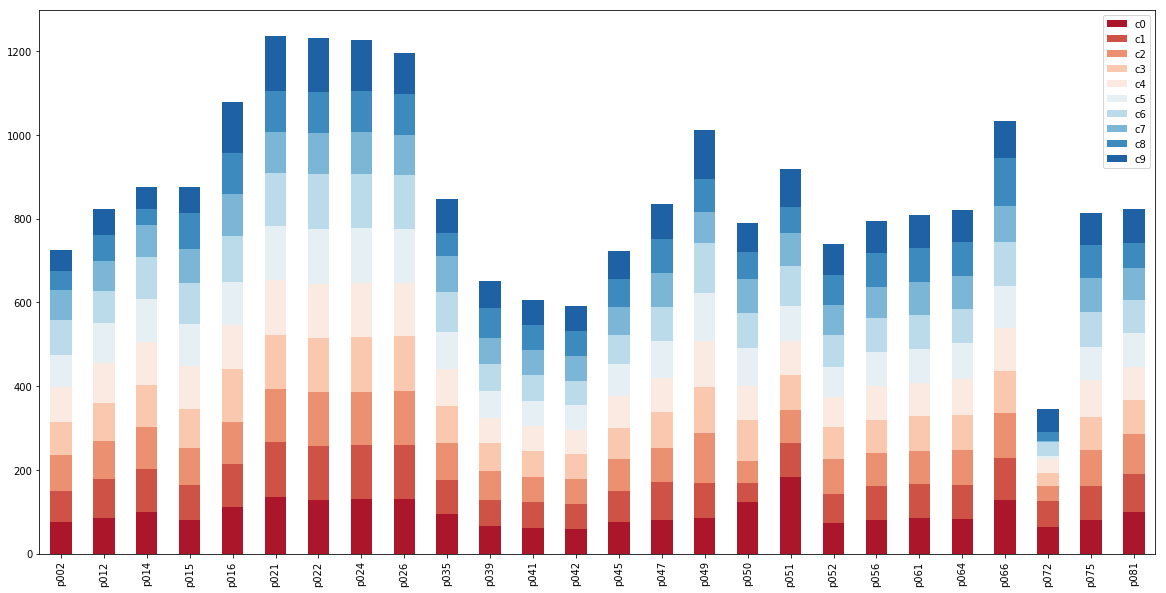

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

with sns.color_palette(palette="RdBu", n_colors=10):
    df.plot.bar(x=drivers, y=safety_status, stacked=True, figsize=(20, 10))

# 数据预处理

** start code 参考来自 https://www.kaggle.com/zfturbo/keras-sample/code **

** get_im函数以path读入image图片信息，并改其大小 **

In [6]:
from keras.preprocessing import image    
import matplotlib.pyplot as plt

#根据第三次review的建议，如果使用以imagenet为权重的预训练模型VGG16，建议align imagenet的预处理方法
#所以RGB->BGR, 然后减均值.
def get_im(path, img_rows=224, img_cols=224, color_type=3):
    
    #read the image
    img = image.load_img(path, target_size=(img_rows, img_cols))
    
    #image to array
    x = image.img_to_array(img)
    
    # RGB >> BGR
    x = x[:, :, ::-1]
    
    # Zero-center by mean pixel
    x[:, :, 0] -= 103.939
    x[:, :, 1] -= 116.779
    x[:, :, 2] -= 123.68
    
    return x

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



** get_driver_data函数读取driver_imgs_list.csv文件，csv有三列(subject,classname,img), 以字典形式返回** <br>
(1) dr，key为img, value为图片对应的subject信息；
(2) subj, key为subject, value为(classname, img);

In [7]:
def get_driver_data():
    dr = dict()
    subj = dict()
    print('Read drivers data')
    
    # 使用没有经过ROI处理的train图像集
    #f = open('/home/ubuntu/distracted_driver_detection/driver_imgs_list.csv', 'r')
    
    # 使用经过ROI处理的train图像集
    f = open('/home/ubuntu/distracted_driver_detection/driver_imgs_list_roi.csv', 'r')
    line = f.readline()
    
    while (1):
        line = f.readline()
        if line == '':
            break
        arr = line.strip().split(',')
        dr[arr[2]] = arr[0]
    
        if arr[0] not in subj.keys():
            subj[arr[0]] = [(arr[1], arr[2])]
        else:
            subj[arr[0]].append((arr[1], arr[2]))
            
    f.close()
    
    return dr, subj

** generate_driver_imgs_list_roi()函数 ** <br>
把driver_imgs_list.csv文件中第三列的所有文件名，加上“ROI”标识，如：
“p002,c0,img_44733.jpg”改为"p002,c0,img_44733_ROI.jpg"

In [8]:
def generate_driver_imgs_list_roi():
    f = open('/home/ubuntu/distracted_driver_detection/driver_imgs_list.csv', 'r')
    with open('/home/ubuntu/distracted_driver_detection/driver_imgs_list_roi.csv', 'w') as filehandle:
        for eachline in f:
            x = eachline.strip().split('.')
            if len(x) == 1:
                filehandle.write('%s\n' % x[0])
            else:
                x = x[0] + "_ROI."+x[1]
                filehandle.write('%s\n' % x)
    filehandle.close()
    f.close()
    
#generate_driver_imgs_list_roi()

** load_train函数导入train图片 **

In [9]:
def load_train(img_rows=224, img_cols=224, color_type=3):
    import glob
    
    X_train = []
    y_train = []
    driver_id = []
    driver_file_id=[]
    unique_drivers = []

    driver_data, dr_class = get_driver_data()
    
    print('Read Train images')
    for j in range(10):
        print('Load folder c{}'.format(j))
        
        #使用未经过ROI处理过的train数据集
        #path = os.path.join('/home/ubuntu/distracted_driver_detection/imgs', 
        #                    'train', 'c' + str(j), '*.jpg')
        
        # 使用经过ROI处理过的train数据集
        path = os.path.join('/home/ubuntu/distracted_driver_detection/imgs', 
                            'train', 'c' + str(j), '*ROI.jpg')
        files = glob.glob(path)
        
        #files = glob(path)
        print('The number of jpg files of c{} folder:{}'.format(j, len(files)))
        
        for fl in files:
            filename = os.path.basename(fl)
            img = get_im(fl, img_rows, img_cols, color_type)
            
            X_train.append(img)
            y_train.append(j)
            driver_file_id.append(filename)
            
            driver_id.append(driver_data[filename])

    unique_drivers = sorted(list(set(driver_id)))
    print('Unique drivers: {}'.format(len(unique_drivers)))
    print(unique_drivers)
    
    return X_train, y_train, driver_file_id, driver_id, unique_drivers

** 定义cache_data与restore_data函数 **

In [10]:
#Saves data into a dump file, in the specified path 
def cache_data(data, path):
    if not os.path.isdir('cache'):
        os.mkdir('cache')
        
    if os.path.isdir(os.path.dirname(path)):
        file = open(path, 'wb')
        pickle.dump(data, file)
        file.close()
    else:
        print('cache directory does not exist')

#Loads data from cache file
def restore_data(path):
    data = dict()
    if os.path.isfile(path):
        print('Restore data from pickle......')
        file = open(path, 'rb')
        data = pickle.load(file)
    return data

** 定义read_and_normalize_train_data函数, normalize方法：除255.0 **

In [11]:
from keras.applications.vgg16 import preprocess_input

def read_and_normalize_train_data(img_rows=224, img_cols=224 , color_type=3):

    train_data, train_target, train_id, driver_id, unique_drivers = load_train(img_rows, img_cols, color_type)
    
    train_data = np.array(train_data, dtype=np.float16)
    
    #normalize
    train_data = train_data / 255.0  
    
    #no_one_hot
    train_target = np.array(train_target, dtype=np.uint8)  
    
    return train_data, train_target, train_id, driver_id, unique_drivers

** 定义辅助函数 **

In [12]:
#from keras.callbacks import *

import datetime
import gc

def dict_to_list(d):
    ret = []
    for i in d.items():
        ret.append(i[1])  
    return ret

def merge_several_folds_mean(data, nfolds):
    a = np.array(data[0])
    for i in range(1, nfolds):
        a += np.array(data[i])
    a /= nfolds  
    return a.tolist()

# Copy the selected drivers data and labels into np.arrays
def copy_selected_drivers(train_data, train_target, driver_id, driver_list, test=False):
    data = []
    target = []
    index = []
    
    for i in range(len(driver_id)):
        if driver_id[i] in driver_list:
            data.append(train_data[i])
            target.append(train_target[i])
            index.append(i)
    
    data = np.array(data, dtype=np.float32)
    target = np.array(target, dtype=np.uint8)
    index = np.array(index, dtype=np.uint32)
    
    if test == True:
        return data, target, index
    else:
        return data, target
    

from keras.callbacks import Callback
# Visualize the train and validation loss plot
# Refer to https://github.com/jartantupjar/7-Distracted-Driver-Detection/blob/master/
#                  Solution%203%20-%20K-fold%20Implementation.ipynb
class PlotLosses(Callback):
    
    # Initializes plot on first epoch
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.logs = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        
        
    # Prints a plot at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):  
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend(['train', 'test'], loc='upper left')
        plt.show();
        
def collect_and_show_garbage():
    print("Start to collect and clear garbage memory.")
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    n = gc.collect()
    gc.garbage
    print('unreachle objects:', n)
    print(gc.garbage)
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    print("End to collect and clear garbage memory.")

class MemoryCallback(Callback):
    
    def on_epoch_end(self, epoch, logs=None):
        collect_and_show_garbage()

# 构建VGG16模型


** 迁移学习VGG16模型的参数，权重使用imgenet **

In [13]:
def VGG16_arch(img_rows, img_cols, img_channel, a):
    
    #Calls the Keras application model with pre trained weights
    base_model = VGG16(input_shape=(img_rows, img_cols, img_channel),
                       weights='imagenet', include_top=False)

    x = base_model.output
    
    #Additional model layers
    x = GlobalMaxPooling2D()(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in model.layers[a:]:
        layer.trainable = True    
    model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy')

    return model

**函数load_pseudo_train(), read_and_normalize_pseudo_train_data(), add_pseudo_train_data_from_test_set()均是对pseudo sample的处理**

In [14]:
import cv2
import pickle

def load_pseudo_train(img_rows=224, img_cols=224, color_type=3, use_roi_picture = True, pseudo_number = 8000):
    import random
    
    pseudo_X_train = []
    pseudo_y_train = []
    
    pseudo_data = restore_data("/home/ubuntu/distracted_driver_detection/testset_result.pkl")
    prefix_path = ''
    
    for class_name, imgs_list in pseudo_data.items():
        
        #random select the data from every driver status
        imgs_list = random.sample(imgs_list, int(pseudo_number/10.0))
        
        # add code: translate the img name to img_roi name, if the use_roi_picture = True
        if use_roi_picture == True:
            prefix_path = '/home/ubuntu/distracted_driver_detection/imgs/test_roi'
            for i in range(len(imgs_list)):
                filename = imgs_list[i]
                f = filename.split(".")
                imgs_list[i] = f[0]+"_"+"ROI"+"."+f[1]
        else: 
            prefix_path = '/home/ubuntu/distracted_driver_detection/imgs/test'
            
        for img in imgs_list:
            path = os.path.join(prefix_path, img)
            img = get_im(path, img_rows, img_cols, color_type)
            pseudo_X_train.append(img)
            pseudo_y_train.append(class_name)
            
    print("load_pseudo_train Done")
    return pseudo_X_train, pseudo_y_train


def read_and_normalize_pseudo_train_data(img_rows=224, img_cols=224, color_type=3, 
                                         use_roi_picture = True, pseudo_number = 8000):
    
    pseudo_train_data, pseudo_train_target = load_pseudo_train(img_rows, img_cols, color_type, 
                                                                use_roi_picture, pseudo_number)
        
    pseudo_train_data = np.array(pseudo_train_data, dtype=np.float16)
    pseudo_train_data = pseudo_train_data / 255.0  #zero-center
    
    pseudo_train_target = np.array(pseudo_train_target, dtype=np.uint8)  #no_one_hot
    
    print('Read_and_normalize_pseudo_train_data Done')
    return pseudo_train_data, pseudo_train_target


def add_pseudo_train_data_from_test_set(X_train, Y_train, use_roi_picture = True, pseudo_number = 8000):
    pseudo_X_train, pseudo_Y_train = read_and_normalize_pseudo_train_data(
        224, 224, 3, use_roi_picture, pseudo_number)
    
    #return X_train.extend(pseudo_X_train), Y_train.extend(pseudo_Y_train)
    return np.concatenate([X_train, pseudo_X_train]), np.concatenate([Y_train, pseudo_Y_train])

**VGG16模型参数准备**

In [15]:
# 图片处理为244*244，是为了适应VGG16模型要求
img_rows=224
img_cols=224
img_channel=3  

nfolds=7
epochs=10
batch_size=32
use_pseudo_train_data = True
use_roi_picture = True
pseudo_number = 8000
freezing_layer = 5

# 训练VGG16模型

In [16]:
import random
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import cv2
import math
import pickle
import datetime
import matplotlib.pyplot as plt

from glob import glob
#from PIL import ImageFile 
#ImageFile.LOAD_TRUNCATED_IMAGES = True 
from sklearn.model_selection import KFold 
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.datasets import load_files
from keras import optimizers
from keras.optimizers import SGD, Adam
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalMaxPooling2D, Dense, Input
from keras.models import Model, model_from_json
from keras.preprocessing import image    
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, ReduceLROnPlateau

def build_VGG16_model(nfolds, epochs, batch_size, img_rows, img_cols, img_channel):
    
    train_files, train_targets, train_id, driver_id, unique_drivers = \
    read_and_normalize_train_data(img_rows=img_rows, img_cols=img_cols, color_type=img_channel)
    
    val_predictions = dict()
    val_score=[]
    
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=51)
    num_fold = 0
    
    for train_drivers, valid_drivers in kf.split(unique_drivers):
        gc.collect()
        gc.garbage
            
        unique_list_train = [unique_drivers[i] for i in train_drivers]
        X_train, Y_train = copy_selected_drivers(train_files, train_targets, 
                                                 driver_id, unique_list_train, False)
        if use_pseudo_train_data == True:
            print("Use_pseudo_train_data")
            X_train, Y_train = add_pseudo_train_data_from_test_set(X_train, Y_train, 
                                                                   use_roi_picture, pseudo_number)
        Y_train = np_utils.to_categorical(Y_train, 10)
        
        unique_list_valid = [unique_drivers[i] for i in valid_drivers]
        X_valid, Y_valid, test_index = copy_selected_drivers(train_files, train_targets, 
                                                             driver_id, unique_list_valid, True)
        
        num_fold += 1
        print('Start KFold number {} of {}'.format(num_fold, nfolds))
        print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
        print('Train drivers:{}, Test drivers:{}'.format(unique_list_train, unique_list_valid))
        
        model = VGG16_arch(img_rows, img_cols, img_channel, freezing_layer)
        
        # Initialize weight path    
        if not os.path.isdir(os.path.join('cache')):
            os.mkdir(os.path.join('cache'))  
        
        kfold_weights_path = os.path.join('cache', 
                                          'weights_kfold_augmented_VGG16' + '_' +  str(num_fold) + '.h5')
        
        # Check if weights already exist 
        if not os.path.isfile(kfold_weights_path):                
            # Intialize Data augmentations            
            train_datagen = ImageDataGenerator(zoom_range=0.2, width_shift_range=0.1,
                                         height_shift_range=0.1, rotation_range=10)
            
            # Initialize callbacks
            callbacks = [EarlyStopping(monitor='val_loss', patience=4, verbose=0),
                         ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=2),
                         ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2), 
                         MemoryCallback(),
                         PlotLosses(), ]

            # Train the model
            model.fit_generator(train_datagen.flow(X_train, Y_train, batch_size=batch_size, seed=51),
                                validation_data=(X_valid, np_utils.to_categorical(Y_valid, 10)), epochs=epochs, use_multiprocessing=False,
                                steps_per_epoch=len(X_train)/batch_size, callbacks=callbacks, verbose=0)
        
        # Load weights
        if os.path.isfile(kfold_weights_path):
            model.load_weights(kfold_weights_path)
        
        # Generate validation data predictions
        pred_result = model.predict(X_valid, batch_size=batch_size, verbose=0)
        
        # For computing accuracy_score and confusion_matrix, get the correspond 
        # probability drive status from pred_result(percentage)
        prob_drive_status = []
        for x in pred_result:
            max_value_index = np.argmax(x)
            prob_drive_status.append(max_value_index)
        prob_drive_status = np.array(prob_drive_status, dtype=np.uint8)  
        
        score = accuracy_score(Y_valid, prob_drive_status)
        print('Score accuracy_score: ', score)
        
        array = confusion_matrix(Y_valid, prob_drive_status)
        print(array)        
        del array

        #one-hot handle to Y_valid
        Y_valid = np_utils.to_categorical(Y_valid, 10)
        score = log_loss(Y_valid, pred_result)
        print('Score log_loss: ', score)
        
        # Store validation score
        val_score.append(score)
        for i in range(len(test_index)):
            val_predictions[test_index[i]] = pred_result[i]
        del pred_result
    
    score_sum=sum(val_score)
    print('Validation Average Score ', score_sum/nfolds)

    # Converts the dictionary to a list
    val_predictions = dict_to_list(val_predictions)
    
    # Get complete dataset validation score
    train_targets = np_utils.to_categorical(train_targets, 10)
    score = log_loss(train_targets, val_predictions)
    
    #Score model
    print('(validation score) Final log_loss: {}, nfolds: {} epoch: {}'.format(score, nfolds, epochs))

    #return val_predictions, train_files, train_targets, val_score

build_VGG16_model(nfolds, epochs, batch_size, img_rows, img_cols, img_channel)

Read drivers data
Read Train images
Load folder c0
The number of jpg files of c0 folder:2489
Load folder c1
The number of jpg files of c1 folder:2267
Load folder c2
The number of jpg files of c2 folder:2317
Load folder c3
The number of jpg files of c3 folder:2346
Load folder c4
The number of jpg files of c4 folder:2326
Load folder c5
The number of jpg files of c5 folder:2312
Load folder c6
The number of jpg files of c6 folder:2325
Load folder c7
The number of jpg files of c7 folder:2002
Load folder c8
The number of jpg files of c8 folder:1911
Load folder c9
The number of jpg files of c9 folder:2129
Unique drivers: 26
['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072', 'p075', 'p081']
Use_pseudo_train_data
Restore data from pickle......
load_pseudo_train Done
Read_and_normalize_pseudo_train_data Done
Start KFold number 1 of 7
2018-08-30 07:22:20
Tr

# 使用训练好的模型预测test数据

In [17]:
import glob

def split_list(l, wanted_parts=1):
    length = len(l)
    return [l[i*length // wanted_parts: (i+1)*length // wanted_parts] for i in range(wanted_parts)]

# 获取测试集数据 
def load_test_data(part, size=(224, 224)):
    
    #使用未经ROI处理过的测试集图片
    #path = os.path.join('/home/ubuntu/distracted_driver_detection/imgs', 'test', '*.jpg')
    
    #使用经ROI处理过的测试集图片
    path = os.path.join('/home/ubuntu/distracted_driver_detection/imgs', 'test_roi', '*_ROI.jpg')
    files = sorted(glob.glob(path))
    ch = split_list(files, 10)
    
    X_test = []
    X_test_id = []
    x, y = size
    for fl in ch[part]:
        flbase = os.path.basename(fl)
        img = get_im(fl, x, y, 3)
        X_test.append(img)
        X_test_id.append(flbase)
    return X_test, X_test_id

# 载入测试数据并进行预处理
def read_test_data(part, size=(224,224)):
    test_data, test_id = load_test_data(part, size)
    #test_data = np.array(test_data, dtype=np.uint8)
    test_data = np.array(test_data, dtype=np.float16)
    test_data = test_data / 255.0  #zero-center
    return test_data, test_id

def append_chunk(main, part):
    for p in part:
        main.append(p)
    return main

In [19]:
from keras.applications.vgg16 import preprocess_input
import time

def predict_test_data():
    
    model = VGG16_arch(img_rows, img_cols, img_channel, freezing_layer)
    
    num_fold = 0
    prediction_list = []
    testid_list = []
    testid_cache_path = os.path.join('cache','testid_list.h5')
    start_time = time.time()
    
    x = ['cache/weights_kfold_augmented_VGG16_1.h5', 'cache/weights_kfold_augmented_VGG16_2.h5',
         'cache/weights_kfold_augmented_VGG16_3.h5', 'cache/weights_kfold_augmented_VGG16_4.h5',
         'cache/weights_kfold_augmented_VGG16_5.h5', 'cache/weights_kfold_augmented_VGG16_6.h5',
         'cache/weights_kfold_augmented_VGG16_7.h5']

    #weights_test_prediction中的key代表使用多少个weights，在weights_test_prediction中key有{0,1,2,3,4}, 
    #所以表示共使用5个weights, 每个key对应的value，表示weights的名称，比如{0:1}中的key为0，value为1，表示使用
    #的weights名为weights_kfold_augmented_VGG16_1.h5
    weights_test_prediction = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7}
    for i in [0,1,2,3,4,5,6]:
        
        num_fold = weights_test_prediction[i]
        weights_path = x[i]
        
        print("Start to compute the result with {}".format(weights_path))
        
        if not os.path.isfile(weights_path):
            print(weights_path +' File not exists')
            return False
        model.load_weights(weights_path)
        
        test_prediction_cache_path = os.path.join('/home/ubuntu/distracted_driver_detection/test_pred_use_pseudo_train_8000', 
                                                  'test_prediction_VGG16_'+str(num_fold)+'.h5')

        if not os.path.isfile(test_prediction_cache_path):
            
            prediction = []
            
            # 测试数据分批读入、预处理、预测
            for part in range(10):
                
                test_data_chunk, test_id_chunk = read_test_data(part, (224, 224))
                
                #test_data_chunk = preprocess_input(test_data_chunk.astype('float16'))
                prediction_part = model.predict(test_data_chunk)
                prediction = append_chunk(prediction, prediction_part)
                
                if i == 0:
                    testid_list = append_chunk(testid_list, test_id_chunk)
                    cache_data(testid_list, testid_cache_path)

            cache_data(prediction, test_prediction_cache_path)
            prediction_list.append(prediction)  
            
        elif not os.path.isfile(testid_cache_path):
            
            for part in range(10):
                test_data_chunk, test_id_chunk = read_test_data(part)
                if i == 0:
                    testid_list = append_chunk(testid_list, test_id_chunk)
                    cache_data(testid_list, testid_cache_path)
            prediction = restore_data(test_prediction_cache_path)
            prediction_list.append(prediction)
            
        else:
            prediction = restore_data(test_prediction_cache_path)
            prediction_list.append(prediction)
            if i == 0:
                testid_list = restore_data(testid_cache_path)
                
        end_time = time.time()
        predict_time_minutes = round(end_time - start_time,2) / 60.0
        print("The time of predict test set: {} minutes ".format(predict_time_minutes))
        
    return prediction_list, testid_list

prediction_list_vgg16, testid_list_vgg16 = predict_test_data()

Start to compute the result with cache/weights_kfold_augmented_VGG16_1.h5
Restore data from pickle......
Restore data from pickle......
The time of predict test set: 0.006500000000000001 minutes 
Start to compute the result with cache/weights_kfold_augmented_VGG16_2.h5
Restore data from pickle......
The time of predict test set: 0.009666666666666665 minutes 
Start to compute the result with cache/weights_kfold_augmented_VGG16_3.h5
Restore data from pickle......
The time of predict test set: 0.012833333333333334 minutes 
Start to compute the result with cache/weights_kfold_augmented_VGG16_4.h5
Restore data from pickle......
The time of predict test set: 0.01583333333333333 minutes 
Start to compute the result with cache/weights_kfold_augmented_VGG16_5.h5
Restore data from pickle......
The time of predict test set: 0.019166666666666665 minutes 
Start to compute the result with cache/weights_kfold_augmented_VGG16_6.h5
Restore data from pickle......
The time of predict test set: 0.02233333

In [20]:
#merge_several_folds_mean()函数中的第二个参数，表示在predict_test_data()函数中我所使用的weight数量，
#在predict_test_data()中我使用了7个weight, 即['cache/weights_kfold_augmented_VGG16_1.h5', 
#'cache/weights_kfold_augmented_VGG16_2.h5''cache/weights_kfold_augmented_VGG16_3.h5', 
#'cache/weights_kfold_augmented_VGG16_4.h5','cache/weights_kfold_augmented_VGG16_5.h5',
#'cache/weights_kfold_augmented_VGG16_6.h5','cache/weights_kfold_augmented_VGG16_7.h5']]
# 所以此处第二个参数我添加了7
result_with10_vgg16 = merge_several_folds_mean(prediction_list_vgg16, 7)
result_with10_vgg16 = np.array(result_with10_vgg16)

def create_submission(predictions, testid_list, filename, submit_file_path='subm'):
    # 为了避免极端值，进行数据裁剪
    start = time.time()
    predictions = predictions.clip(min=1e-15, max=(1-1e-15))
    df = pd.DataFrame(np.array(predictions), columns=['c'+str(i) for i in range(10)])
    df.insert(0, 'img', testid_list)
    path = os.path.join(submit_file_path, filename)
    df.to_csv(path, index=None)
    end = time.time()
    print("file to CSV:{} seconds".format(round(end - start, 2)))
    print('Create submit file finished')

create_submission(result_with10_vgg16, testid_list_vgg16, 'submission_10_vgg16_20180830_Use1234567_VGG16.csv')


file to CSV:1.54 seconds
Create submit file finished
